# [코로나 전후 항공사별 항공수요 분석](https://www.youtube.com/watch?v=bCCWwmaSJ0E&list=PLaTc2c6yEwmqrXsGvpB3vK_nAzPEzr-ib&index=2)

## [국가통계포털](https://www.youtube.com/watch?v=8nQj3r1oY0I)

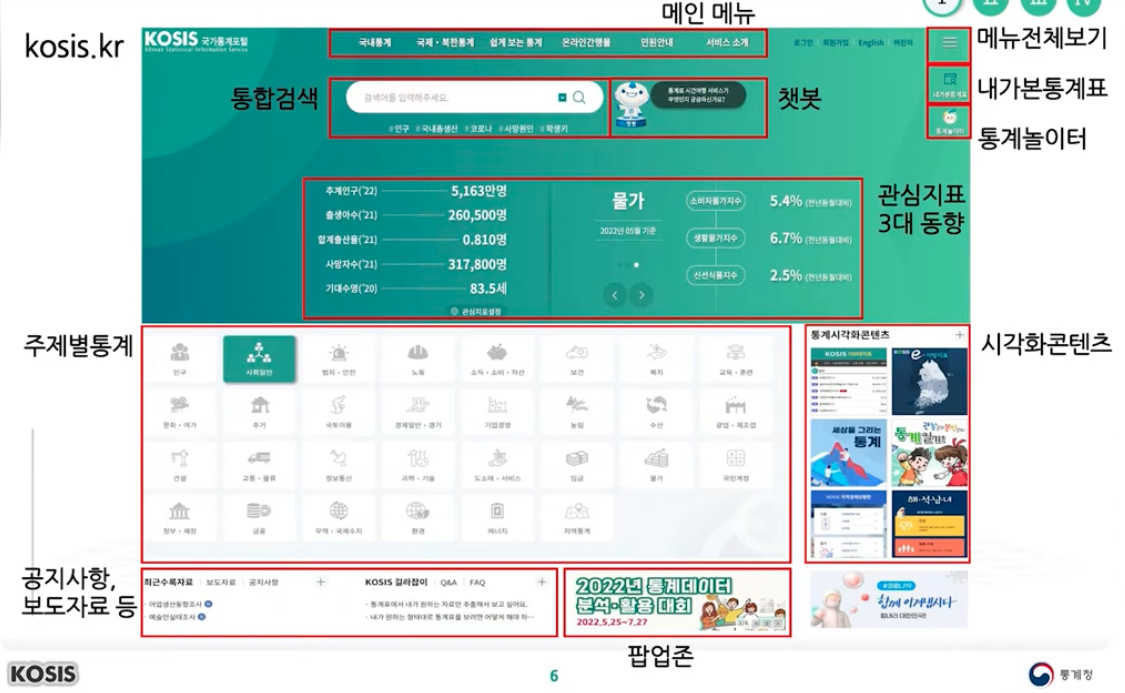

## [항공사별 통계 다운로드](https://kosis.kr/statHtml/statHtml.do?orgId=381&tblId=DT_920005_B008&conn_path=I2)

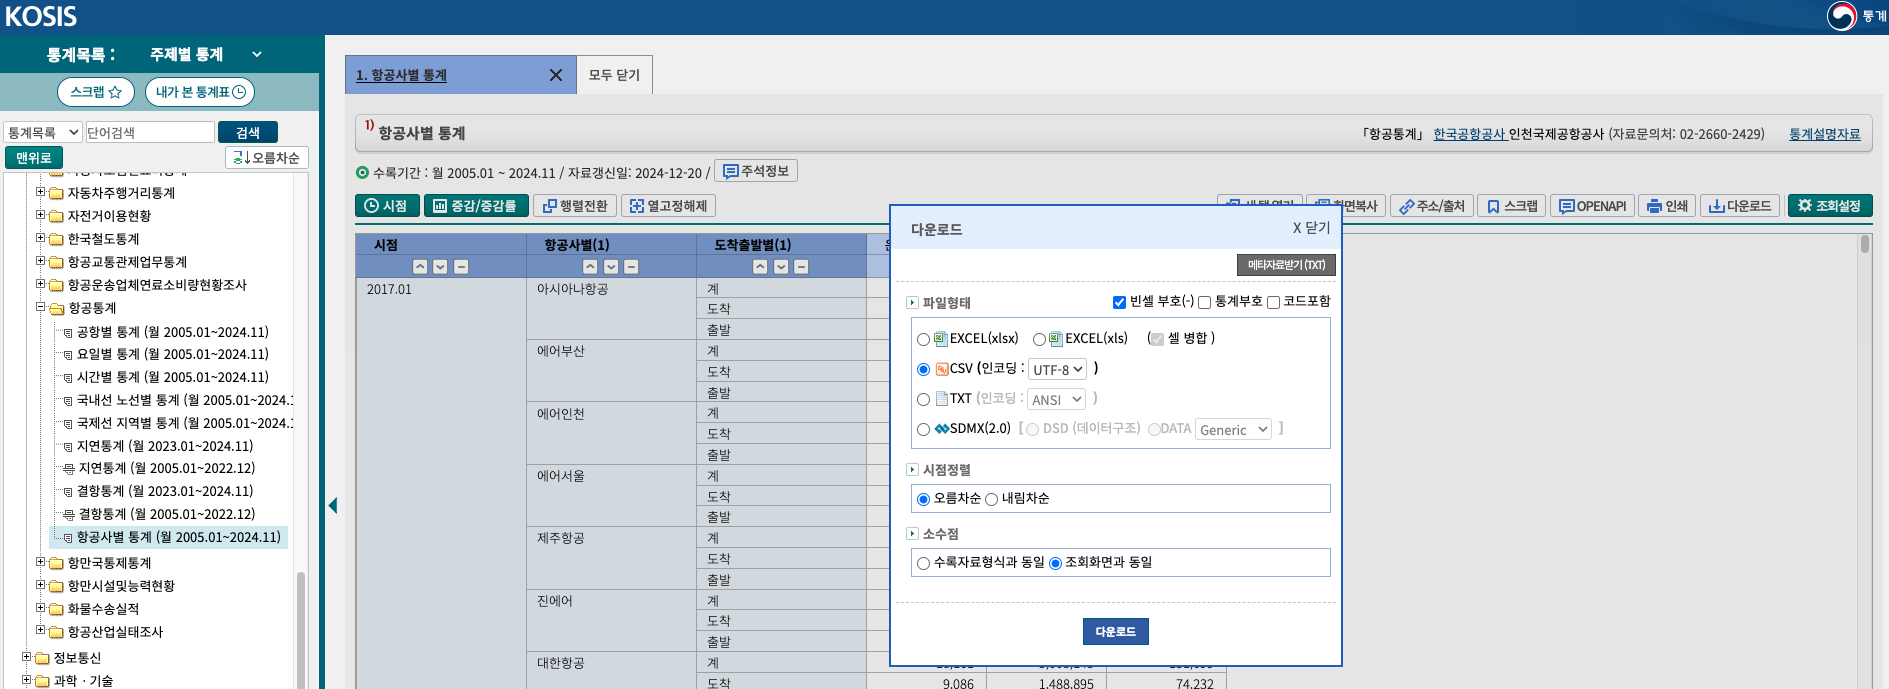

In [1]:
import pandas as pd
from glob import glob

file_names = glob("*.csv")
file_names

['kosis-airline-company.csv']

In [15]:
df_comp = pd.read_csv(file_names[0], dtype={"시점": "object"})
df_comp.head()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,2017.01,아시아나항공,계,12278,2150562,83765
1,2017.01,아시아나항공,도착,6141,1071932,41237
2,2017.01,아시아나항공,출발,6137,1078630,42528
3,2017.01,에어부산,계,5551,917653,10293
4,2017.01,에어부산,도착,2777,458649,6799


In [18]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시점          3132 non-null   object 
 1   항공사별(1)     3132 non-null   object 
 2   도착출발별(1)    3132 non-null   object 
 3   운항 (편)      3132 non-null   int64  
 4   여객 (명)      3132 non-null   int64  
 5   화물 (톤)      3132 non-null   int64  
 6   운항 (편)_증가율  3117 non-null   float64
 7   여객 (명)_증가율  2828 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 195.9+ KB


In [3]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.0 MB/s eta 0:00:00


## 데이터 분석

In [4]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 항공사별로 연간 평균 여객 수 계산

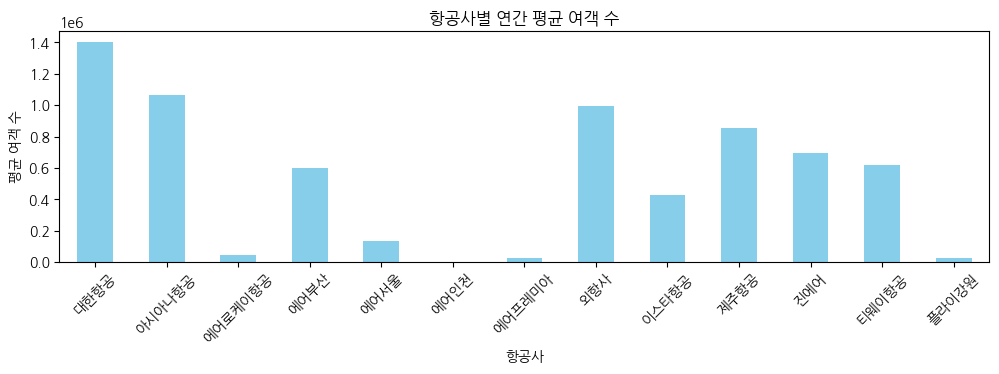

In [16]:
# 항공사별로 연간 평균 여객 수 계산
average_passengers_by_airline = df_comp.groupby("항공사별(1)")["여객 (명)"].mean()

# 그래프로 표시
plt.figure(figsize=(12, 3))
average_passengers_by_airline.plot(kind="bar", color="skyblue")
plt.title("항공사별 연간 평균 여객 수")
plt.xlabel("항공사")
plt.ylabel("평균 여객 수")
plt.xticks(rotation=45)
plt.show()

### 연간 운항 및 여객 증가율 계산:
- 연간 운항 편수 및 여객 수의 증가율을 계산하여 항공사별로 비교합니다.

In [19]:
# 연간 운항 편수 증가율 계산
df_comp["운항 (편)_증가율"] = df_comp.groupby("항공사별(1)")["운항 (편)"].pct_change() * 100

# 연간 여객 수 증가율 계산
df_comp["여객 (명)_증가율"] = df_comp.groupby("항공사별(1)")["여객 (명)"].pct_change() * 100
df_comp.head()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (명)_증가율
0,2017.01,아시아나항공,계,12278,2150562,83765,NaN,NaN
1,2017.01,아시아나항공,도착,6141,1071932,41237,-49.983711,-50.155727
2,2017.01,아시아나항공,출발,6137,1078630,42528,-0.065136,0.624853
3,2017.01,에어부산,계,5551,917653,10293,NaN,NaN
4,2017.01,에어부산,도착,2777,458649,6799,-49.972978,-50.019343


### 도착/출발별로 연간 운항 및 여객 분석:
- 도착과 출발별로 연간 운항 편수 및 여객 수를 분석합니다

In [20]:
# 도착별 연간 운항 편수 및 여객 수 분석
arrival_stats = df_comp[df_comp["도착출발별(1)"] == "도착"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

arrival_stats.head()

,운항 (편),여객 (명)
시점,,
2017.01,35679,6020504
2017.02,32213,5629399
2017.03,35118,5606531
2017.04,34226,5777657
2017.05,35760,5969435


<Axes: xlabel='시점'>

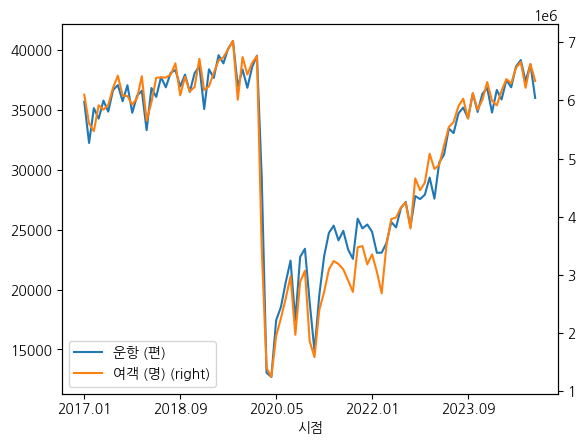

In [21]:
# 출발별 연간 운항 편수 및 여객 수 분석
departure_stats = df_comp[df_comp["도착출발별(1)"] == "출발"].groupby("시점")[["운항 (편)", "여객 (명)"]].sum()

departure_stats.plot(secondary_y="여객 (명)")

### 시간에 따른 화물 운송량 시각화:
- 시간에 따른 화물 운송량의 추이를 시각화합니다.

In [28]:
# 시간에 따른 화물 운송량 시각화
df_comp["시점"] = pd.to_datetime(df_comp["시점"])  # 날짜 형식으로 변환
df_comp["년"] = df_comp["시점"].dt.year
df_comp["월"] = df_comp["시점"].dt.month
df_comp["일"] = df_comp["시점"].dt.day
df_comp["요일"] = df_comp["시점"].dt.dayofweek # (월 = 0)

In [29]:
df_comp.head()

,시점,항공사별(1),도착출발별(1),운항 (편),여객 (명),화물 (톤),운항 (편)_증가율,여객 (명)_증가율,년,월,일,요일
0,2017-01-01,아시아나항공,계,12278,2150562,83765,NaN,NaN,2017,1,1,6
1,2017-01-01,아시아나항공,도착,6141,1071932,41237,-49.983711,-50.155727,2017,1,1,6
2,2017-01-01,아시아나항공,출발,6137,1078630,42528,-0.065136,0.624853,2017,1,1,6
3,2017-01-01,에어부산,계,5551,917653,10293,NaN,NaN,2017,1,1,6
4,2017-01-01,에어부산,도착,2777,458649,6799,-49.972978,-50.019343,2017,1,1,6


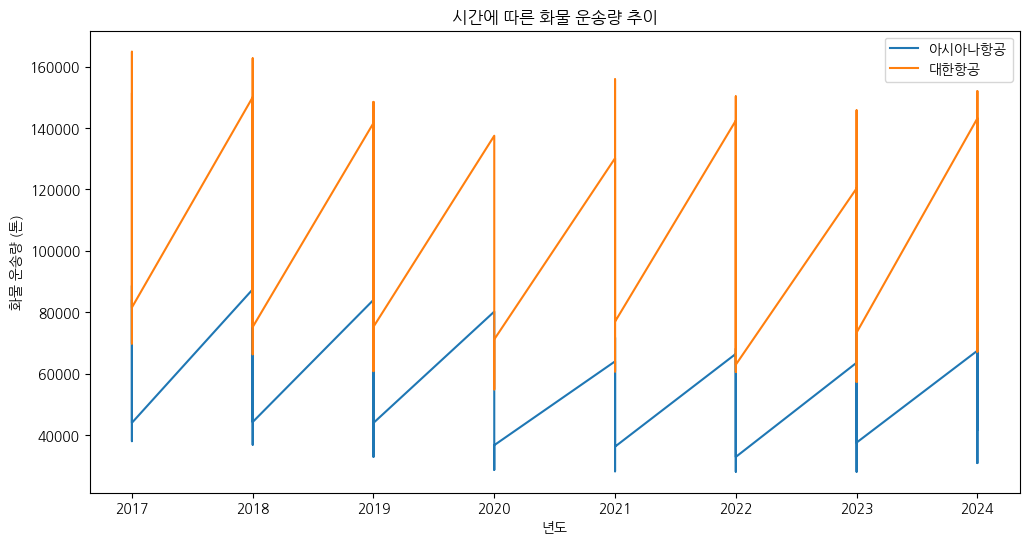

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df_comp[df_comp["항공사별(1)"] == "아시아나항공"]["년"], df_comp[df_comp["항공사별(1)"] == "아시아나항공"]["화물 (톤)"], label="아시아나항공")
plt.plot(df_comp[df_comp["항공사별(1)"] == "대한항공"]["년"], df_comp[df_comp["항공사별(1)"] == "대한항공"]["화물 (톤)"], label="대한항공")
plt.xlabel("년도")
plt.ylabel("화물 운송량 (톤)")
plt.legend()
plt.title("시간에 따른 화물 운송량 추이")
plt.show()

In [38]:
df_comp["항공사별(1)"].unique()

array(['아시아나항공', '에어부산', '에어인천', '에어서울', '제주항공', '진에어', '대한항공', '티웨이항공',
       '이스타항공', '외항사', '플라이강원', '에어로케이항공', '에어프레미아'], dtype=object)

In [36]:
year_comp = pd.crosstab(index=df_comp["년"],
            columns=df_comp["항공사별(1)"],
            values=df_comp["여객 (명)"],
            aggfunc="sum").fillna(0)

year_comp.style.background_gradient(axis=None).format("{:,.0f}")

항공사별(1),대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
년,,,,,,,,,,,,,
2017,"70,575,670","51,211,892",0,"22,726,932","1,653,816",0,0,"49,027,972","17,266,904","30,636,882","25,023,584","18,538,560",0
2018,"68,586,500","52,470,070",0,"25,338,992","3,456,064",0,0,"54,434,888","18,047,126","33,627,096","25,033,364","20,040,734",0
2019,"70,990,506","53,499,532",0,"24,506,686","4,016,142",0,0,"60,083,744","18,720,442","36,554,542","24,753,818","22,130,992","90,484"
2020,"23,518,040","21,999,484",0,"14,375,486","4,222,400",0,0,"9,438,334","3,111,876","19,686,356","15,944,094","17,156,048","602,008"
2021,"21,497,908","19,346,928","545,572","18,018,006","6,756,248",0,"327,108","2,749,520",0,"26,112,382","23,463,122","20,642,042","547,416"
2022,"35,277,006","26,914,676","1,475,228","21,336,378","6,911,952",0,"197,576","14,045,498",0,"29,066,536","26,337,566","22,688,034","1,429,314"
2023,"53,098,068","38,324,846","1,941,086","22,812,902","6,030,152",0,"1,349,094","42,419,826","7,509,248","34,736,266","29,457,726","28,983,556","513,308"
2024,"55,789,968","39,010,894","2,786,792","21,618,558","5,016,922",0,"1,410,070","50,861,104","13,088,978","33,545,172","28,709,656","26,346,692",0


<Axes: title={'center': '저가항공 연도별 여객 수'}, xlabel='년'>

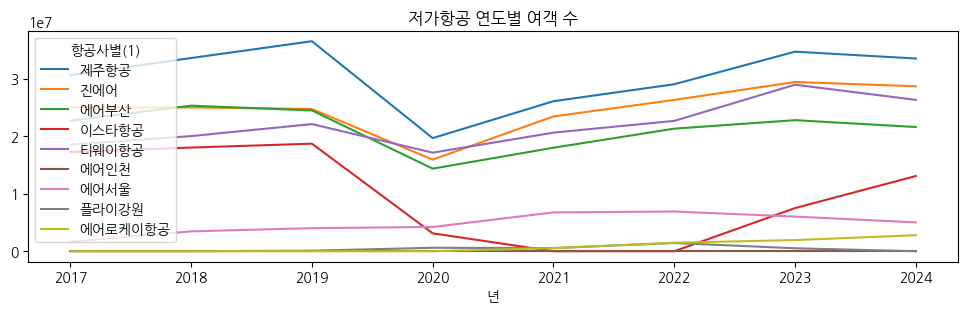

In [39]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공']].plot(figsize=(12, 3), title="저가항공 연도별 여객 수")


In [41]:
year_comp = pd.crosstab(index=df_comp["년"],
            columns=df_comp["항공사별(1)"],
            values=df_comp["운항 (편)"],
            aggfunc="sum").fillna(0)

year_comp.style.background_gradient(axis=None, cmap="Greens").format("{:,.0f}")

항공사별(1),대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
년,,,,,,,,,,,,,
2017,"432,156","289,222",0,"138,196","11,674","1,884",0,"312,896","105,188","172,758","128,168","108,286",0
2018,"431,742","281,360",0,"153,298","20,342","3,074",0,"333,666","104,432","193,066","133,270","117,660",0
2019,"427,330","278,912",0,"153,774","23,144","2,536",0,"362,962","109,702","215,322","130,058","133,422",720
2020,"225,354","170,250",0,"100,416","23,982","2,762",0,"128,458","20,244","127,120","107,160","112,166","6,048"
2021,"230,194","161,360","5,668","114,572","35,844","4,768","1,314","117,250",0,"157,174","154,976","125,344","5,196"
2022,"263,376","178,972","8,528","120,818","35,148","6,674","1,360","146,488",0,"170,320","162,922","126,176","10,522"
2023,"324,732","220,606","12,300","128,200","30,762","7,112","4,864","282,536","42,208","203,406","165,898","160,624","3,606"
2024,"339,268","208,898","18,092","118,404","25,876","6,222","5,080","328,154","75,460","198,420","161,596","147,050",0


<Axes: title={'center': '저가항공 연도별 운항 수'}, xlabel='년'>

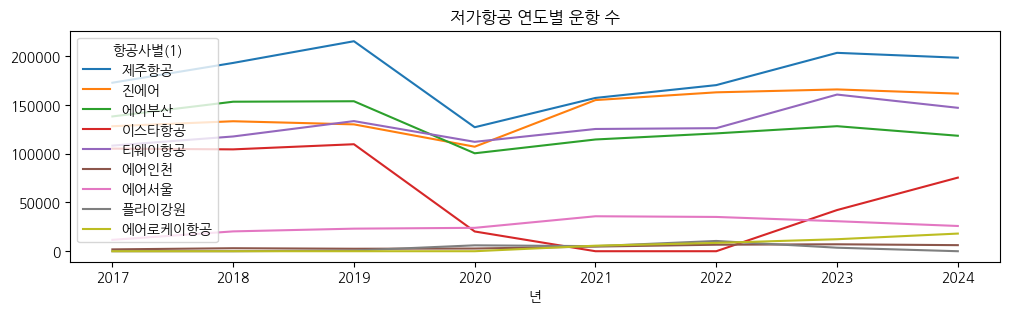

In [42]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공']].plot(figsize=(12, 3), title="저가항공 연도별 운항 수")


In [43]:
year_comp = pd.crosstab(index=df_comp["년"],
            columns=df_comp["항공사별(1)"],
            values=df_comp["화물 (톤)"],
            aggfunc="sum").fillna(0)

year_comp.style.background_gradient(axis=None, cmap="Oranges").format("{:,.0f}")

항공사별(1),대한항공,아시아나항공,에어로케이항공,에어부산,에어서울,에어인천,에어프레미아,외항사,이스타항공,제주항공,진에어,티웨이항공,플라이강원
년,,,,,,,,,,,,,
2017,"3,758,652","2,006,361",0,"178,093","16,519","13,350",0,"2,579,587","100,295","209,519","243,986","117,167",0
2018,"3,651,140","2,095,210",0,"169,347","31,390","36,490",0,"2,744,099","113,490","229,320","230,620","129,274",0
2019,"3,388,880","1,969,880",0,"147,607","33,636","35,520",0,"2,778,846","111,927","240,918","214,045","145,153",472
2020,"3,007,989","1,630,865",0,"77,927","18,701","24,695",0,"1,812,785","17,211","94,821","98,341","82,348","3,445"
2021,"3,474,432","1,617,591","3,071","83,933","20,688","52,350","1,326","2,100,826",0,"102,775","109,769","88,926","3,148"
2022,"3,231,856","1,546,261","8,828","108,906","27,604","75,565","16,682","2,108,853",0,"156,737","144,494","124,661","7,844"
2023,"3,215,333","1,620,594","11,716","147,797","40,093","78,646","60,453","2,396,073","33,807","285,445","221,512","217,369","3,871"
2024,"3,190,788","1,562,960","18,053","146,685","37,693","72,800","68,222","2,477,353","70,994","288,751","232,164","216,814",0


<Axes: title={'center': '저가항공 연도별 화물(톤) 수'}, xlabel='년'>

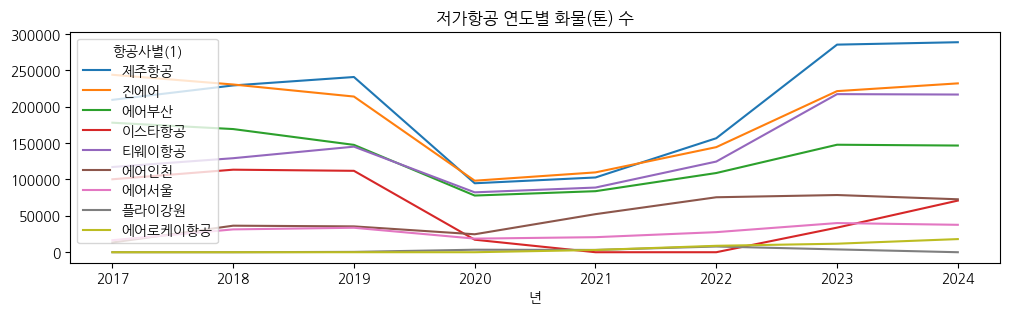

In [44]:
year_comp[['제주항공', '진에어', '에어부산', '이스타항공', '티웨이항공',
       '에어인천', '에어서울', '플라이강원', '에어로케이항공']].plot(figsize=(12, 3), title="저가항공 연도별 화물(톤) 수")
